# Simple K-means clustering using Python (from scratch)
### Machine Learning Episode-1.1

#### **Developed on March 2, 2021**


## Clustering 

#### The term clustering describes the process of partitioning a dataset into several subsets, also known as **clusters**. A key challenge in clustering is **unsupervised learning** (it means that no target variable, a.k.a. **Y variable**, is required to train the algorithm). 


## K-Means Clustering

#### The K-means clustering algorithm is a popular unsupervised clustering algorithm which searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It is arguably most popular and simple clustering model in Machine Learning.

#### Its idea is incredibly simple and yet powerful: we assume that the input data can be partitioned into **k** clusters, such that every data point only belongs to exactly one cluster. 

> #### *Every data point belongs to the particular cluster for which the Euclidean distance of that point to the cluster centre is smaller compared to all other clusters*.

#### What it means is that each point is closer to its own ***cluster center*** than to other cluster centers.

#### **Note:** The ***cluster center*** is the arithmetic mean of all the points belonging to the cluster.

#### Let us dive into little bit of mathematics before we start coding from scratch (you can totally skip this section if you are interested only in the coding part)



## Mathematics

#### Let $X = \left( \begin{matrix} x_1^\top \\ \vdots \\ x_s^\top \end{matrix} \right) \in \mathbb{R}^{s \times d}$ be the collection of $s$ data points (or sample points) with $d$-dimensions (number of features) and we aim to identify two matrices $z \in \mathbb{R}^{s \times k}$ and $\mu \in \mathbb{R}^{k \times d}$ that minimise the following function:

$$ L(z, \mu) = \sum_{i = 1}^s \sum_{j = 1}^k z_{ij} \| x_i - \mu_j \|^2 \, . $$

#### Here, every $\mu_{j} \in \mathbb{R}^{d}$ is the is the matrix representation of *centroids of the cluster* (or the **cluster center** previously described) and $\mu$ contains all the $k$ centroid vectors. The matrix $z$ contains the cluster assignments, i.e. the information which data point belongs to which cluster.

#### We can intuitively see that we are trying to minimize the **Euclidean distance** between the data point $x_i$ and the centroid $\mu_j$. The optimization of this function do not have a closed form solution, therefore we will solve for $\mu$ and $z$ iteratively in an alternating fashion also known as coordinate descent.

## Algorithm for K-means clustering

#### K-means imagines each cluster as a solar system. 

> #### The star that everything (all the observations) in the cluster revolves around is known as the cluster’s centroid.

#### So given a set of centroids and their coordinates (where the X coordinate is fare and the Y coordinate is age), we can easily figure out what cluster each observation belongs to by calculating which centroid it is closest to (in terms of Euclidean distance).

#### But how do we decide where the centroids are? That’s where the K-means algorithm comes in. First, we pick a value for $k$, the number of centroids (this is a hyperparameter that we must tune). Let’s say we pick $k=4$. Then we can just pick $4$ points at random and assign them to be our starting centroids. And using our randomly chosen starting centroids, we can create $4$ clusters. Sounds kind of silly right? What’s the point to picking random centroids and creating random clusters?

#### **Here’s the trick**: the means of our clusters become our new centroids. And as long as our starting randomly picked centroids were even slightly different from each other, the new centroids (the cluster means) will be more optimal than our initial clusters; where **optimization** is based on all the mathematics we just described.

#### Once we have our new centroids, we can reassign each observations' cluster based on which of the new centroids it is closest to. Since the centroids became a bit more optimal, our clusters should improve too (in terms of homogeneity within cluster and variance across clusters). And now we can again calculate new centroids from the means of the coordinates of the reassigned clusters. These centroids will have again improved upon their predecessors, and we can keep rinsing and repeating this process until the algorithm has converged. 



#### **Before we start coding it up, let’s refresh ourselves on the steps**:


---


#### 1. Randomly assign centroids to start things up.

#### 2. Based on those centroids (and an observation’s distance from it), assign each observation to a cluster.

#### 3. Calculate the mean coordinates of each cluster; these are our new centroids.

#### 4. Reassign clusters based on new centroids.

#### 5. Keep repeating steps 3 and 4 until convergence.


---



## Pseudocode (more sophisticated version of the above steps)


#### **`Specify`**: 
#### 1. number of clusters $k$
#### 2. maximum number of iterations $N$
#### 3. tolerance limit (for stopping criterion) $\epsilon$

#### **`Initialise`**: 
#### $\mu_{0} \in \mathbb{R}^{k \times d}$

#### **`Iterate`**:
#### for $l = 0, . . . , N − 1$ do
$$
z^{l+1}_{ij} = \left\{\begin{matrix}
1 & j=argmin_{r \in (1,2,\cdots ,k)}\left \| x_i - \mu^{l}_{r} \right \|^2\\ 
0 & \text{otherwise}
\end{matrix}\right. \hspace{0.5cm} \text{for} \hspace{0.2cm} i \in (1,2,\cdots s)
$$
<br>
$$
\mu^{l+1}_{j} = \frac{\sum_{i=1}^{s}z^{l+1}_{ij}x_i}{\sum_{i=1}^{s}z^{l+1}_{ij}}  \hspace{0.5cm} \text{for} \hspace{0.2cm} j \in (1,2,\cdots k)
$$
<br>
#### Make sure that the algorithm stops as as soon as 

$$
\frac{\left(L(z^l, \mu^l) - L(z^{l + 1}, \mu^{l + 1})\right) }{L(z^{l + 1}, \mu^{l + 1})} \leq \epsilon 

$$

#### end for

#### **`Return`**
#### $z^N$, $\mu^N$

#### Now enough of the Maths and Algorithm, let us directly jump into the coding part

### As usual, we begin by loading the necessary libraries.

In [40]:
%matplotlib inline
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Dataset

#### Since our main focus is to build K-means and explore how it works, initially we will just work with a dataset having 2 features and 2 clusters. We begin by loading the [Old Faithful dataset](https://www.kaggle.com/janithwanni/old-faithful) with the following cell. 

#### The [Old Faithful dataset](https://www.kaggle.com/janithwanni/old-faithful) is a well-known dataset in Statistics in Machine Learning. The data includes the **waiting time between eruptions** and the **duration of the eruption for the Old Faithful geyser** in Yellowstone National Park, Wyoming, USA. The data can be described as follows:

In [14]:
old_faithful_dataset = pd.read_csv("faithful.csv")
old_faithful_dataset = old_faithful_dataset[['eruptions','waiting']]
old_faithful_dataset

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


In [17]:
X = old_faithful_dataset.to_numpy()
print(X.shape)

(272, 2)


Therefore our $X = \left( \begin{matrix} x_1^\top=(3.6,79) \\ \vdots \\ x_{272}^\top = (4.467,74) \end{matrix} \right) \in \mathbb{R}^{272 \times 2}$ is the collection of $272$ data points (or sample points) with $2$-dimensions (number of features)

#### Let us visualize the clusters which is visible to the eye but yet to be trained (for the machine)

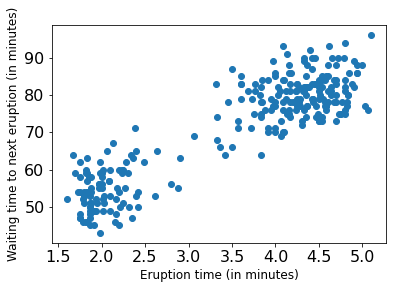

In [18]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Eruption time (in minutes)', fontsize=12)
plt.ylabel('Waiting time to next eruption (in minutes)', fontsize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;

#### Clearly we can see that 2 clusters are present, now we are going to implement $K$-means clustering to cluster the ***Old Faithful dataset*** into $k=2$ clusters. Before we start any computations, we manually set a seed for the random number generator.

In [19]:
np.random.seed(13)

#### To make life easier, let’s define a helper function. First let’s write one to calculate Euclidean distance between 2 points(a.k.a. the straight line distance between 2 points). The function we define is a rather general one which can calculate the Euclidean distance between all the data points $X$ and the centroid clusters $\mu$.

In [31]:
def pairwise_distances(argument1,argument2):
    '''
    Parameters:
    argument1: Matrix of the shape (s,d)
    argument2: Matrix of the shape (k,d)

    Return:
    pairwise_distances: Matrix of the shape (s,k)

    Action:
    The function calculates and returns the Euclidean distance between all the 
    points in argument1 and argument2
    '''
    return (np.linalg.norm(argument1[:, None, :] - argument2[None, :, :], axis=-1))**2

#### All the explaination of the code is present in the comments itself

In [42]:
def k_means_clustering(data, no_of_clusters, centroids=None, maximum_counter=300, tolerance=1e-9, print_output=10):   
    '''
    Parameters:
    data: Matrix of the shape (s,d) (represents X)
    no_of_clusters: integer (represents k)
    centroids: Matrix of the shape (k,d) (represents μ)
    maximum_counter: integer (represents N in pseudocode)
    tolerance: float (represents ϵ in Pseudocode)
    print_output: integer (prints the update after print_output iteration)

    Return:
    centroids: Matrix of the shape (k,d) (represents updated μ)
    z: Matrix of the shape (s,k) (represents updated assignment)

    Action:
    The function performs K-means clustering of data X and computes and returns
    the centroid clusters and the assignment z (predicted cluster to which data belongs)
    '''

    # Randomly assigning the centroid
    idx = np.random.choice(len(data), no_of_clusters, replace=False)
    if centroids is None:
        centroids = data[idx, :]
    
    # Initialize the function L (which is to be minimized)
    L_prev = 1e100

    # P stores the index of the minimum Euclidean distance between the centroid and the data point
    '''
    Say our data X has 272 samples and 2 features. We cluster it into 2 groups (k=2).
    So μ has the shape of 2x2 (2 cluster x 2 features). So the Euclidean distance matrix D will
    have the shape 272x2 i.e., a particular ith row and jth column of D will store the distance between the 
    ith row of X (1x2 vector, ith sample from 272 samples) and the jth row of μ (1x2 vector) represents jth cluster from k total clusters.
    So basically P will store the index of the cluster which is closest to ith sample of X. 
    '''
    P = np.argmin(pairwise_distances(data, centroids),axis=1)

    for iteration in range(maximum_counter):
        # Calculating the centroid using the formula described in the pseudocode
        centroids = np.vstack([data[P==i,:].mean(axis=0) for i in range(no_of_clusters)])
        D = pairwise_distances(data, centroids)
        tmp = np.argmin(D,axis=1)
        z = np.zeros((len(data), no_of_clusters))
        # calculating the assignment matrix (as described in the Pseudocode)
        for i in range(len(data)):
            z[i,P[i]] = 1
        # Calculating the optimization function 
        L_new = np.sum(z*D)
        # Checking for Tolerance limit (come out of the loop if criteria is satisfied)
        if ((L_prev-L_new)/L_new)<tolerance:
            print('Converged at iteration number:',iteration)
            break
        # Print the updates after print_output steps 
        if iteration%print_output==0:
            print('Iterations completed:',str(iteration)+'/'+str(maximum_counter))
        # The previous values will now become the new calculated/ updated values
        L_prev = L_new
        P = tmp
    
    # Finally returning the centroids and the assignment matrix
    return centroids,z

#### Now its time to check our function. Cluster the Old Faithful dataset into two clusters and store the centroids in *centroids* and the assignments in *assignments*. Let us initialise our centroids with the two centroid vectors $\mu_1 = \left( \begin{matrix} 3.5 & 50\end{matrix}\right)^\top$ and $\mu_2 = \left( \begin{matrix} 3 & 80\end{matrix}\right)^\top$. We could have left it **None**, but because I know the converged solution, I am initializing them with the nearby numbers.

In [44]:
# YOUR CODE HERE
centroids_0 = np.array([[3.5,50],
                      [3,80]])
centroids,assignments = k_means_clustering(X, 2, centroids_0, print_output=40)

Iterations completed: 0/300
Converged at iteration number: 2


#### We had set the maximum iterations to be 300, but our solution converged in just 2 iterations!

#### Let us visualise our clustering results with the following lines of code.

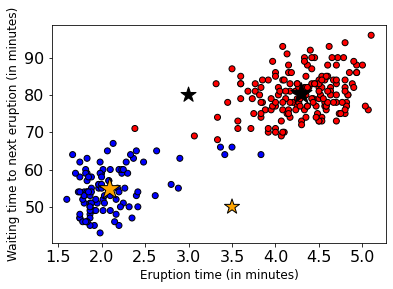

In [49]:
colormap_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=assignments[:, 0], cmap=colormap_bright, edgecolors='k')
plt.scatter(centroids_0[:, 0], centroids_0[:, 1], marker="*", s=250, color=["orange", "k"], edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker="*", s=500, color=["orange", "k"], edgecolors='k')
plt.xlabel('Eruption time (in minutes)', fontsize=12)
plt.ylabel('Waiting time to next eruption (in minutes)', fontsize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;

#### Hurray! So we can see that the 2 centroids are well located in their respective clusters. We can also see that the initial centroids were far located from the converged solution and the clusters as well. But they eventually learned and reached their respective clusters

#### In K-means algorithm, it is a good practise to first standardize the dataset before performing clustering. We now repeat the previous exercise, but we standardise the data first. We a function **standardise** that takes a data matrix _data_ as its input and returns a matrix for which all columns have ***mean zero*** and ***standard deviation one***.

In [50]:
def standardise(data):
    '''
    Parameters:
    data: Matrix of the shape (m,n)
    
    Return:
    data: Matrix of the shape (m,n) (Standardized)
    '''
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

#### Visualise your standardised data with the following cell.

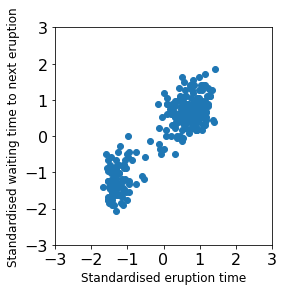

In [51]:
standardised_X = standardise(X)
plt.scatter(standardised_X[:, 0], standardised_X[:, 1])
plt.xlabel('Standardised eruption time', fontsize=12)
plt.ylabel('Standardised waiting time to next eruption', fontsize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
plt.tight_layout;

#### Let us compute the $k$-means clustering solution for $k = 2$ clusters for the standardised data *standardised_X* with initial centroids $\mu_1 = \left( \begin{matrix} -1.8 & 1.2\end{matrix}\right)^\top$ and $\mu_2 = \left( \begin{matrix} 1.8 & -1.7\end{matrix}\right)^\top$. Visualise your results in similar fashion as before. Do you spot any differences?

Iterations completed: 0/300
Converged at iteration number: 5


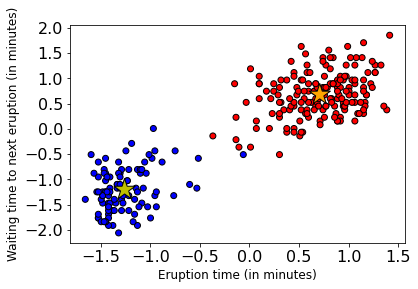

In [55]:
# YOUR CODE HERE
centroids = np.array([[-1.8,1.2],
                      [1.8,-1.7]])
centroids,assignments = k_means_clustering(standardised_X, 2, centroids, print_output=40)
colormap_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(standardised_X[:, 0], standardised_X[:, 1], c=assignments[:, 0], cmap=colormap_bright, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker="*", s=500, color=["y", "orange"], edgecolors='k')
plt.xlabel('Eruption time (in minutes)', fontsize=12)
plt.ylabel('Waiting time to next eruption (in minutes)', fontsize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout;

## Colour compression (Use of K-Means in Image processing)

#### We condlude this article with another clustering application: the compression of colour images. An 8-bit RGB image can represent $256 = 2^8$ values per colour-channel. Suppose we would like to approximate such an image with an $n$-bit RGB image, where $n < 8$. How do we choose the $3 n$ colour-intensity values, so that the image looks similar to the original image? Our task is to show that this can be done with k-means clustering. First, we load an 8-bit test image and visualise it. You can download the image of Mandrill from [here](https://commons.wikimedia.org/wiki/File:Mandrill-k-means.png)

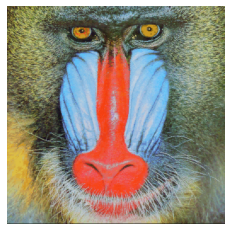

In [56]:
from skimage import io, img_as_float64
mandrill = img_as_float64(io.imread('Mandrill.png'))
plt.imshow(mandrill)
plt.axis('off')
plt.tight_layout;

#### Apply k-means clustering to the Mandrill image. Set the number of clusters to $2^\text{no_of_bits}$, where *no_of_bits* is a variable between 1 and 8.

In [62]:
no_of_bits = 2
no_of_clusters = 2**(no_of_bits)
mandrill2d = mandrill.reshape((-1,3))
centroids,assignments = k_means_clustering(mandrill2d, no_of_clusters, print_output=10)

Iterations completed: 0/300
Iterations completed: 10/300
Converged at iteration number: 14


#### Let us create an image that only uses the colours identified as centroids with k-means clustering algorithm and store it in a variable named *mandrill_approximation*.

In [63]:
pred = np.argmax(assignments,axis=1)
mandrill_approximation = centroids[pred].reshape(mandrill.shape)

#### Finally visualise the results in comparison to the original image.

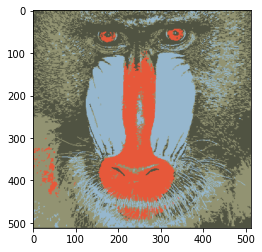

In [64]:
plt.imshow(mandrill_approximation)  # no of bits = 2 (you can change it from 1-8)
plt.show()

## Conclusion


---


#### Obviously there is a lot more we can do including adding more features (versus just $2$), tuning $k$ (the *number of clusters*), and trying to better understand the identity and key characteristics of each cluster. But that’s something for another day. I hope that by reading this article, you gained some insight into how clustering works (along with boring mathematical stuff), and how K-means uses a wonderfully simple algorithm to produce some awesome results. Also you learned to code K-means from scratch. 


---


### Cheers and thanks for reading!

